In [24]:
import os
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/sensitivity_conjugate/'
os.chdir(working_dir)

In [25]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

In [26]:
import shutil

dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs)


['seed_7__dim_10__complete', 'seed_3__dim_8__complete', 'seed_9__dim_4__complete', 'seed_0__dim_6__complete', 'seed_6__dim_2__complete', 'seed_2__dim_10__complete', 'seed_8__dim_8__complete', 'seed_2__dim_4__complete', 'seed_9__dim_2__complete', 'seed_6__dim_10__complete', 'seed_6__dim_4__complete', 'seed_3__dim_10__complete', 'seed_4__dim_6__complete', 'seed_2__dim_2__complete', 'seed_7__dim_8__complete', 'seed_5__dim_10__complete', 'seed_7__dim_2__complete', 'seed_1__dim_6__complete', 'seed_8__dim_4__complete', 'seed_2__dim_8__complete', 'seed_0__dim_10__complete', 'seed_3__dim_4__complete', 'seed_9__dim_8__complete', 'seed_4__dim_10__complete', 'seed_7__dim_4__complete', 'seed_8__dim_2__complete', 'seed_1__dim_10__complete', 'seed_6__dim_8__complete', 'seed_3__dim_2__complete', 'seed_5__dim_6__complete', 'seed_9__dim_6__complete', 'seed_0__dim_4__complete', 'seed_8__dim_10__complete', 'seed_4__dim_2__complete', 'seed_2__dim_6__complete', 'seed_1__dim_8__complete', 'seed_5__dim_8__co

In [27]:

dir_num = len(dirs)

# N_alpha_array = jnp.array([5])
Nx_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))
# N_theta_array = jnp.array([30])
Ny_array = jnp.arange(5, 105, 5)

dim_all = jnp.array([2, 4, 6, 8, 10])
seed_num = 10


Time_dict_all_dim = {}

for dim in dim_all:
    Time_dict = {}

    dir_temp = []
    for filename in dirs:
        if f'dim_{dim}' in filename:
            dir_temp.append(filename)
    dir_num_temp = len(dir_temp)
    print(dim)
    
    for Nx in Nx_array:
        Time_dict_temp = {}

        Time_dict_temp['BMC mean'] = []
        Time_dict_temp['BMC se'] = []
        Time_dict_temp['LSMC mean'] = []
        Time_dict_temp['LSMC se'] = []
        Time_dict_temp['IS mean'] = []
        Time_dict_temp['IS se'] = []
        Time_dict_temp['KMS mean'] = []
        Time_dict_temp['KMS se'] = []

        for Ny in Ny_array:
            time_BMC = np.zeros(dir_num_temp)
            for l, d in enumerate(dir_temp):
                with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                    dict_all = pickle.load(f)
                time_BMC[l] = dict_all['BMC']

            Time_dict_temp['BMC mean'].append(time_BMC.mean())
            Time_dict_temp['BMC se'].append(scipy.stats.sem(time_BMC))

            time_LSMC = np.zeros(dir_num_temp)
            for l, d in enumerate(dir_temp):
                with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                    dict_all = pickle.load(f)
                time_LSMC[l] = dict_all['LSMC']

            Time_dict_temp['LSMC mean'].append(time_LSMC.mean())
            Time_dict_temp['LSMC se'].append(scipy.stats.sem(time_LSMC))

            time_IS = np.zeros(dir_num_temp)
            for l, d in enumerate(dir_temp):
                with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                    dict_all = pickle.load(f)
                time_IS[l] = dict_all['IS']

            Time_dict_temp['IS mean'].append(time_IS.mean())
            Time_dict_temp['IS se'].append(scipy.stats.sem(time_IS))

            time_KMS = np.zeros(dir_num_temp)
            for l, d in enumerate(dir_temp):
                with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                    dict_all = pickle.load(f)
                time_KMS[l] = dict_all['KMS']

            Time_dict_temp['KMS mean'].append(time_KMS.mean())
            Time_dict_temp['KMS se'].append(scipy.stats.sem(time_KMS))


        Time_dict_temp['BMC mean'] = np.array(Time_dict_temp['BMC mean'])
        Time_dict_temp['BMC se'] = np.array(Time_dict_temp['BMC se'])

        Time_dict_temp['LSMC mean'] = np.array(Time_dict_temp['LSMC mean'])
        Time_dict_temp['LSMC se'] = np.array(Time_dict_temp['LSMC se'])    

        Time_dict_temp['IS mean'] = np.array(Time_dict_temp['IS mean'])
        Time_dict_temp['IS se'] = np.array(Time_dict_temp['IS se'])

        Time_dict_temp['KMS mean'] = np.array(Time_dict_temp['KMS mean'])
        Time_dict_temp['KMS se'] = np.array(Time_dict_temp['KMS se'])

        Time_dict[f"{Nx}"] = Time_dict_temp

    Time_dict_all_dim[f"{dim}"] = Time_dict

2
4
6
8
10


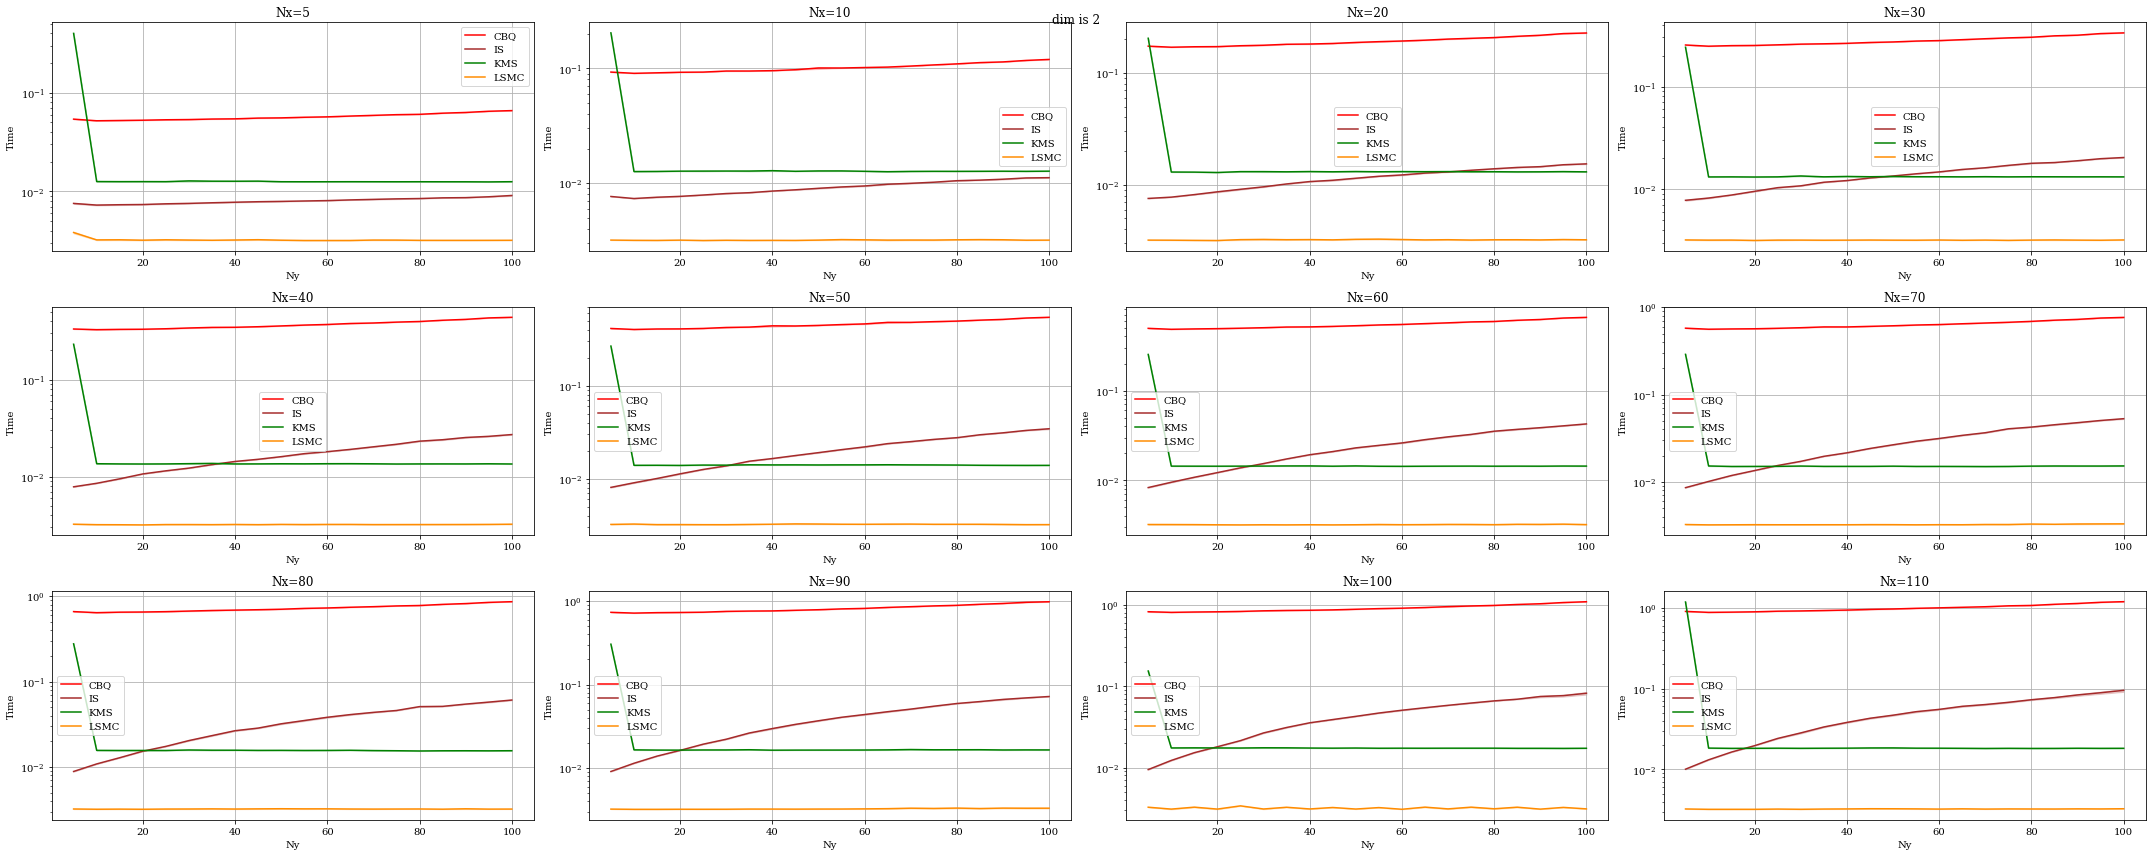

In [28]:
dim = 2

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC mean'] - Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC se'], 
                        Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC mean'] + Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS mean'] - Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS se'], 
                        Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS mean'] + Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS mean'] - Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS se'], 
                        Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS mean'] + Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC mean'] - Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC se'], 
                        Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC mean'] + Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.tight_layout()
plt.suptitle(f'dim is {dim}')
plt.show()

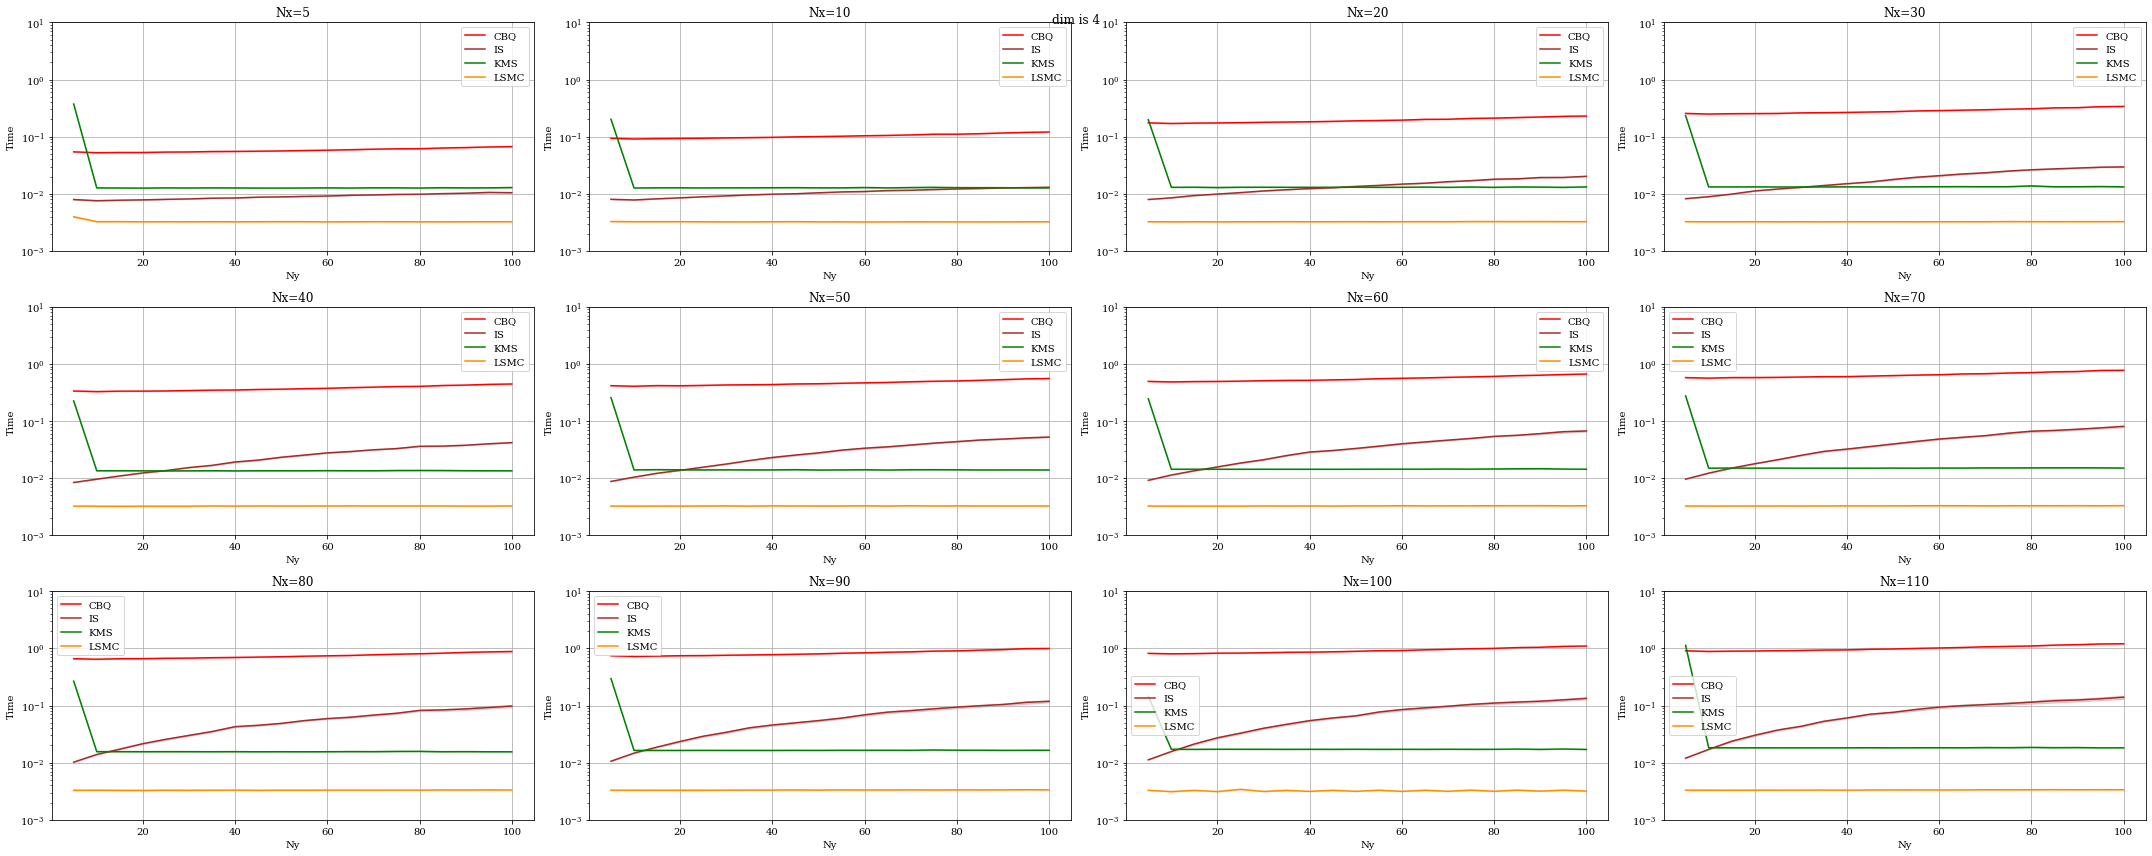

In [29]:
dim = 4

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC mean'] - Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC se'], 
                        Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC mean'] + Time_dict_all_dim[f"{dim}"][f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS mean'] - Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS se'], 
                        Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS mean'] + Time_dict_all_dim[f"{dim}"][f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS mean'] - Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS se'], 
                        Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS mean'] + Time_dict_all_dim[f"{dim}"][f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC mean'] - Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC se'], 
                        Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC mean'] + Time_dict_all_dim[f"{dim}"][f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylim(1e-3, 10.)
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.tight_layout()
plt.suptitle(f'dim is {dim}')
plt.show()

In [25]:
dim = 2

large_Nx_array = [1000]
large_Ny_array = [1000]

dir_temp = []
for filename in dirs:
    if f'dim_{dim}' in filename:
        dir_temp.append(filename)
dir_num_temp = len(dir_temp)
print(dim)
    
for Nx in large_Nx_array:
    for Ny in large_Ny_array:
        time_KMS_large = np.zeros(dir_num_temp)
        time_LSMC_large = np.zeros(dir_num_temp)
        time_IS_large = np.zeros(dir_num_temp)
        
        mse_KMS_large = np.zeros(dir_num_temp)
        mse_LSMC_large = np.zeros(dir_num_temp)
        mse_IS_large = np.zeros(dir_num_temp)
        
        for l, d in enumerate(dir_temp):
            with open(f"{d}/time_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                time_KMS_large[l] = dummy_dict['KMS']
                time_LSMC_large[l] = dummy_dict['LSMC']
                time_IS_large[l] = dummy_dict['IS']
                
            with open(f"{d}/mse_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                mse_KMS_large[l] = dummy_dict['KMS']
                mse_LSMC_large[l] = dummy_dict['LSMC']
                mse_IS_large[l] = dummy_dict['IS']

                
print('===== MSE =====')
print(f'KMS with large samples has MSE {mse_KMS_large.mean()}')
print(f'LSMC with large samples has MSE {mse_LSMC_large.mean()}')
print(f'IS with large samples has MSE {mse_IS_large.mean()}')


print('===== Time =====')
print(f'KMS with large samples has Time {time_KMS_large.mean()}')
print(f'LSMC with large samples has Time {time_LSMC_large.mean()}')
print(f'IS with large samples has Time {time_IS_large.mean()}')


2
===== MSE =====
KMS with large samples has MSE 0.003304604807635769
LSMC with large samples has MSE 0.0028525182795419825
IS with large samples has MSE 0.007130085001699626
===== Time =====
KMS with large samples has Time 92.44423303604125
LSMC with large samples has Time 0.5964449405670166
IS with large samples has Time 703.7902732372283


In [26]:
dim = 4

large_Nx_array = [1000]
large_Ny_array = [1000]

dir_temp = []
for filename in dirs:
    if f'dim_{dim}' in filename:
        dir_temp.append(filename)
dir_num_temp = len(dir_temp)
print(dim)
    
for Nx in large_Nx_array:
    for Ny in large_Ny_array:
        time_KMS_large = np.zeros(dir_num_temp)
        time_LSMC_large = np.zeros(dir_num_temp)
        time_IS_large = np.zeros(dir_num_temp)
        
        mse_KMS_large = np.zeros(dir_num_temp)
        mse_LSMC_large = np.zeros(dir_num_temp)
        mse_IS_large = np.zeros(dir_num_temp)
        
        for l, d in enumerate(dir_temp):
            with open(f"{d}/time_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                time_KMS_large[l] = dummy_dict['KMS']
                time_LSMC_large[l] = dummy_dict['LSMC']
                time_IS_large[l] = dummy_dict['IS']
                
            with open(f"{d}/mse_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                mse_KMS_large[l] = dummy_dict['KMS']
                mse_LSMC_large[l] = dummy_dict['LSMC']
                mse_IS_large[l] = dummy_dict['IS']

                
print('===== MSE =====')
print(f'KMS with large samples has MSE {mse_KMS_large.mean()}')
print(f'LSMC with large samples has MSE {mse_LSMC_large.mean()}')
print(f'IS with large samples has MSE {mse_IS_large.mean()}')


print('===== Time =====')
print(f'KMS with large samples has Time {time_KMS_large.mean()}')
print(f'LSMC with large samples has Time {time_LSMC_large.mean()}')
print(f'IS with large samples has Time {time_IS_large.mean()}')


4
===== MSE =====
KMS with large samples has MSE 0.0029347379197133703
LSMC with large samples has MSE 0.0034105767277651466
IS with large samples has MSE 0.0058356324560008945
===== Time =====
KMS with large samples has Time 92.19992728233338
LSMC with large samples has Time 0.5655160427093506
IS with large samples has Time 701.0646026849747


In [20]:
dummy_dict

{'BMC': None,
 'KMS': Array(0.0004599, dtype=float32),
 'LSMC': Array(0.00018269, dtype=float32),
 'IS': Array(0.0041195, dtype=float32)}